# VA 2021-2022 sem-1 Opdracht 1

Vul hier je naam in: 

- Omer Erdem, Klas 3, 500802898
- Safak Inan, Klas 1, 500802749

## Deadline

De deadline voor deze opdracht is: 10 september 17:59

## Deel 1 - Schaatsen

We gaan kijken naar de 500m meter tijden van de broers Ronald en Michel Mulder geschaatst in Thialf (bron:osta.nl). De dataset is te vinden op BrightSpace. Zorg dat deze dataset zich in dezelfde map als deze notebook zit. Ter voorbereiding op een visualisatie nemen we de volgende stappen.
* We laden de package `pandas` in en noemen het `pd`.
* We gebruiken de functie `head` om de eerste vijf regels uit de dataset te bekijken.
* We gebruiken de functie `info` om de structuur van de dataset te bekijken.
* We gebruiken de functie `describe` om de statische waarden te bekijken.

In [1]:
import pandas as pd
schaatstijden = pd.read_csv('Schaatstijden500m.csv')
schaatstijden['Datum'] = pd.to_datetime(schaatstijden['Datum'])

In [2]:
schaatstijden.head()

,Tijd,Datum,Ijsbaan,Rijder
0,89.80,2020-01-26,IJsstadion Thialf (NED),Ronald
1,34.86,2020-01-25,IJsstadion Thialf (NED),Ronald
2,34.92,2020-01-18,IJsstadion Thialf (NED),Ronald
3,35.27,2019-12-27,IJsstadion Thialf (NED),Michel
4,35.38,2019-12-27,IJsstadion Thialf (NED),Ronald


In [3]:
schaatstijden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tijd     76 non-null     float64       
 1   Datum    76 non-null     datetime64[ns]
 2   Ijsbaan  76 non-null     object        
 3   Rijder   76 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.5+ KB


In [4]:
schaatstijden.describe()

,Tijd
count,76.000000
mean,35.815263
std,6.280937
min,34.490000
25%,34.917500
50%,35.055000
75%,35.272500
max,89.800000


## Onderdeel 1

Kijk eens goed naar de tabellen hierboven en geef antwoord op de volgende vragen.
* Hoeveel 500m tijden zitten er in de dataset?
* Wat is de snelste tijd?

#### Antwoord:
76
34.49

## Onderdeel 2

Maak een histogram van de kolom `Tijd`. Vul de code aan, voldoe aan de volgende extra eisen en pas verder geen dingen aan.
* Kies de juiste kolom.
* Maak de histogram oranje.
* Gebruik een geschikte titel.
* Gebruik een geschikt x-as label.
* Gebruik een geschikt y-as label.

In [5]:
import matplotlib.pyplot as plt

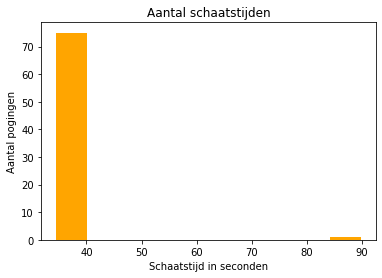

In [6]:
plt.hist(schaatstijden['Tijd'], color='orange')
plt.title('Aantal schaatstijden')
plt.xlabel("Schaatstijd in seconden")
plt.ylabel("Aantal pogingen")
plt.show()

Wellicht heb je het al gezien. Een van de broers is gevallen tijdens een rit. Dit resulteerde in tijd een stuk langzamer dan normaal. Filter deze tijd uit de dataset en maak de histogram nogmaals.

In [7]:
interquartile = schaatstijden.describe().loc['75%'] - schaatstijden.describe().loc['25%']
iqr = interquartile * 1.5
upperoutlier = schaatstijden.describe().loc['75%'] + iqr
schaatstijden = schaatstijden[schaatstijden['Tijd'] < upperoutlier[0]]

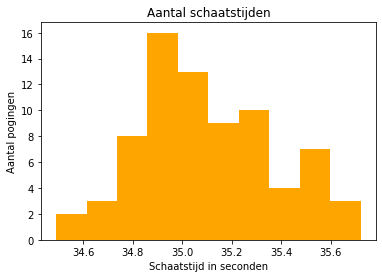

In [8]:
plt.hist(schaatstijden['Tijd'], color='orange')
plt.title('Aantal schaatstijden')
plt.xlabel("Schaatstijd in seconden")
plt.ylabel("Aantal pogingen")
plt.show()

## Onderdeel 3

Voor de volgende analyse gaan we een boxplot maken. (gebruik de dataset zonder val) We willen een uitspraak doen welke broer sneller is op de 500m in Thialf. Maak een boxplot van de tijden van Ronald en een boxplot van de tijden van Michel. Voldoe aan de volgende eisen.
* Voeg een lijn blauwe toe met het huidige baan record in thialf, 34,07
* Gebruik een geschikte titel.
* Gebruik een geschikt x-as label.
* Gebruik een geschikt y-as label.

In [9]:
schaatstijdenBoxplotData = {'Ronald': schaatstijden[schaatstijden['Rijder'] == 'Ronald']['Tijd'],
                            'Michel': schaatstijden[schaatstijden['Rijder'] == 'Michel']['Tijd']}

In [10]:
schaatstijdenDF = pd.DataFrame(schaatstijdenBoxplotData)
schaatstijdenDF.describe()

,Ronald,Michel
count,35.000000,40.000000
mean,34.935143,35.235750
std,0.191194,0.259357
min,34.490000,34.620000
25%,34.820000,35.035000
50%,34.920000,35.230000
75%,35.035000,35.472500
max,35.380000,35.720000


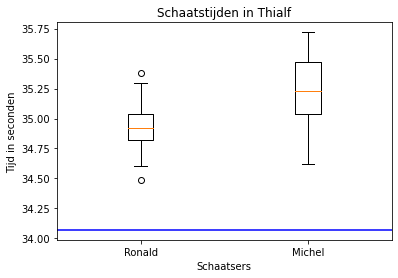

In [11]:
plt.boxplot([schaatstijdenBoxplotData['Ronald'], schaatstijdenBoxplotData['Michel']], labels = ['Ronald', 'Michel'])
plt.axhline(y=34.07, color='b')
plt.title("Schaatstijden in Thialf")
plt.xlabel("Schaatsers")
plt.ylabel("Tijd in seconden")
plt.show()

## Onderdeel 4

Deze vraag gaat over visualisatie gemaakt bij onderdeel 3. Doe een uitspraak over de welke broer het snelst is. Gebruik een maat voor locatie en voor spreiding in je antwoord.

#### Antwoord

Wat we kunnen zeggen over de locatie is dat de boxplot van Ronald een stuk lager ligt dan Michel, wat betekend dat de minimum en maximum waardes lager liggen. Daarnaast is de spreiding van de boxplot ook wat smaller, wat betekend dat Ronald op meerdere momenten de zelfde tijd aanhield. Hiermee kunnen we concluderen dat Ronald over het algemeen wat sneller was dan zijn broer Michel. 

## Onderdeel 5

De broers hebben tijdens een aantal wedstrijden tegen elkaar gereden (niet uitsluitend in dezelfde rit). Ook deze data staat op BrightSpace, we laden de data in en berekenen het verschil van het onderlinge resultaat.

In [12]:
schaatstijdenVerschil = pd.read_csv('Schaatstijden500m verschil.csv')
schaatstijdenVerschil['Datum'] = pd.to_datetime(schaatstijdenVerschil['Datum'])

In [13]:
schaatstijdenVerschil['Verschil'] = schaatstijdenVerschil['Ronald'] - schaatstijdenVerschil['Michel']

In [14]:
schaatstijdenVerschil.head()

,Datum,Ijsbaan,Michel,Ronald,Verschil
0,2017-12-27,IJsstadion Thialf (NED),34.98,34.49,-0.49
1,2018-12-28,IJsstadion Thialf (NED),35.04,34.60,-0.44
2,2018-10-03,IJsstadion Thialf (NED),35.72,34.67,-1.05
3,2017-10-28,IJsstadion Thialf (NED),35.58,34.69,-0.89
4,2017-12-22,IJsstadion Thialf (NED),34.90,34.74,-0.16


Maakt een histogram van het verschil tussen de broers.

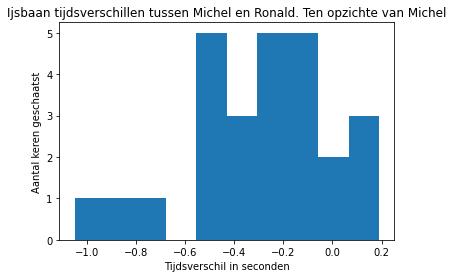

In [15]:
plt.hist(schaatstijdenVerschil['Verschil'])
plt.title("Ijsbaan tijdsverschillen tussen Michel en Ronald. Ten opzichte van Michel")
plt.xlabel("Tijdsverschil in seconden")
plt.ylabel("Aantal keren geschaatst")
plt.show()

## Onderdeel 6

Deze vraag gaat over visualisatie gemaakt bij onderdeel 5. Doe een uitspraak over de welke broer het snelst is. Gebruik een maat voor locatie en voor spreiding in je antwoord.

#### Antwoord

Zoals je kan zien in de visualisatie, is het grafiek ten opzichte van Michel. Dit betekent dat bij positieve getallen op de X-as, dat michel sneller is ten opzichte van Ronald, en bij negatieve getallen op de X-as, dat michel langzamer is ten opzichte van Ronald. Uit de grafiek zien we dat Michel in 20 poging langzamer was dan Ronald en in 5 pogingen sneller dan Ronald. Hiermee kunnen we concluderen dat Ronald sneller is. Ook is het verschil duidelijk te zien, waarbij Ronald tot een hele seconde verschil sneller was dan Michel en maar tot 0.2 seconden was dan Michel.

## Onderdeel 7

Deze meer geavanceerde visualisatie gaat over het verloop van de tijden over de jaren. Maak een dataframe van schaatstijdenVerschil met de gemiddelde 500m tijd per broer per jaar (mocht je over de skills beschikken, dan mag het ook per schaatsseizoen september t/m maart).

In [16]:
#code om gemiddelde per jaar te berekenen
schaatstijdenVerschil['Datum'] = schaatstijdenVerschil['Datum'].dt.year
gemPerJaarPerBroer = schaatstijdenVerschil.groupby(['Datum']).mean()

In [17]:
print(gemPerJaarPerBroer)

          Michel     Ronald  Verschil
Datum                                
2015   35.500000  35.120000 -0.380000
2016   35.211667  34.916667 -0.295000
2017   35.271667  34.826667 -0.445000
2018   35.224000  34.916000 -0.308000
2019   35.088333  34.980000 -0.108333


Maak een lijndiagram met op de x-as het jaar en op de y-as de gemiddelde tijd per jaar. Geef een lijn per broer weer. Geef de visualisatie geschikte titels en een legenda.

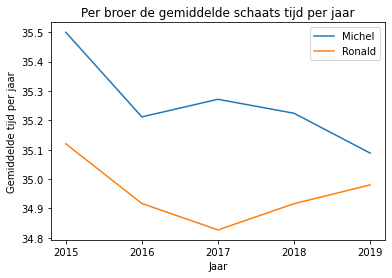

In [18]:
plt.plot(gemPerJaarPerBroer["Michel"], label="Michel")
plt.plot(gemPerJaarPerBroer["Ronald"], label="Ronald")
xtickpos = xticklabel = gemPerJaarPerBroer.index
plt.xticks(xtickpos, xticklabel)
plt.title("Per broer de gemiddelde schaats tijd per jaar")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde tijd per jaar")
plt.legend()
plt.show()

## Onderdeel 8 (bonus opdracht)

Met deze vraag gaan we ook kijken wat we nog meer kunnen zeggen over de huidige data. 
* Hoe vaak van alle keren was Ronald/Michel sneller?
* Hoeveel procent van de keren was dit?
* Maak een top 20 van snelste tijden van de langzamere broer en maak een top 20 van langzaamste tijden van de snellere broer.
* Hoe vaak had de langzame broer kunnen winnen van de snelle broer als hij zijn snelste tijden had gereden en de snelle broer zijn langzaamste tijden? (gebruik de gesoorteerde tabellen van de tijden om dit te tellen)


#### Antwoord